In [ ]:
#Make figure PC

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

data shape:  (200001, 60)
(200001, 5)
(200001, 5)
break 1010


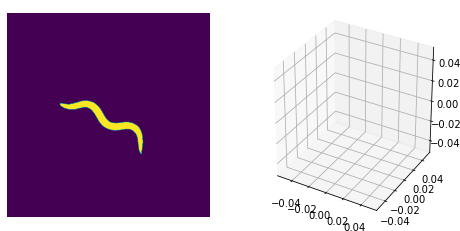

In [21]:
#loading datat
input_filepath='/groups/zimmer/Ulises/wbfm/chemotaxis_assay/2020_Only_behaviour/btf_all_binary2_eroded_twice/2020-07-01_18-36-25_control_worm6-channel-0-bigtiff.btf'

path='2020-07-01_18-36-25_control_worm6_spline_K.csv'

# has no reversals path='/groups/zimmer/Ulises/wbfm/chemotaxis_assay/2020_Only_behaviour/all_good_skeleton/2020-06-30_18-17-47_chemotaxis_worm5_spline_K.csv'
df=pd.read_csv(path, header=None)

df.shape
#What to do with Nas?
#df.dropna(inplace=True) #Drop NaNs, required otherwise pca.fit_transform(x) does not run
df.fillna(0, inplace=True) #alternative change nans to zeros
features = np.arange(30,90)# Separating out the features (starting bodypart, ending bodypart)
data = df.loc[:, features].values
print('data shape: ', data.shape)

#PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(data)
print(principalComponents.shape)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3','PC4','PC5'])# 'PC6', 'PC7', 'PC8','PC9','PC10'])
print(principalDf.shape)


fig = plt.figure(figsize=plt.figaspect(0.5))
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2, projection='3d')

avg_win=167

with tiff.TiffFile(input_filepath, multifile=False) as tif:
    for i, page in enumerate(tif.pages):
        if i%10!=0: continue
        img=page.asarray()
        
        #
        x=principalDf.loc[i-100:i,'PC1'].rolling(window=avg_win).mean()
        y=principalDf.loc[i-100:i,'PC2'].rolling(window=avg_win).mean()
        z=principalDf.loc[i-100:i,'PC3'].rolling(window=avg_win).mean()
        
        
        ax0.imshow(img)
        ax0.set_axis_off()
        
        
        
        ax1.plot(x, y, z, label='BH PC')
        fig.show()
        
        if i>1000:
            print('break', i)
            break
        

In [ ]:
ax1 = fig2.gca(projection='3d')
#time=np.arange(193195,196000)
avg_win=167
x=principalDf.loc[time,'PC1'].rolling(window=avg_win).mean()
y=principalDf.loc[time,'PC2'].rolling(window=avg_win).mean()
z=principalDf.loc[time,'PC3'].rolling(window=avg_win).mean()

ax1.
ax1.legend()

plt.show()